<a href="https://colab.research.google.com/github/MauricioCastroF/VC1_EntregaTP/blob/main/TP1_PARTE_1_1_Castro_FrancoMauricio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/vision_computadora_I.git
!cd vision_computadora_I && git checkout 8va-cohorte

Cloning into 'vision_computadora_I'...
remote: Enumerating objects: 523, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 523 (delta 7), reused 32 (delta 7), pack-reused 488
Receiving objects: 100% (523/523), 156.95 MiB | 46.80 MiB/s, done.
Resolving deltas: 100% (161/161), done.
Branch '8va-cohorte' set up to track remote branch '8va-cohorte' from 'origin'.
Switched to a new branch '8va-cohorte'


# ***Parte 1a: ***
Implementar el algoritmo de pasaje a coordenadas cromáticas

Se importan las librerías:

In [3]:
%matplotlib inline  
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

Se carga el material del repositorio

In [4]:
cd vision_computadora_I/Material_TPs/TP1/coord_cromaticas

/content/vision_computadora_I/Material_TPs/TP1/coord_cromaticas


Se cargan las imágenes sin transformación

In [8]:
img1 = cv.imread('CoordCrom_1.png');img2 = cv.imread('CoordCrom_2.png');img3 = cv.imread('CoordCrom_3.png')

Se desamblan los canales (RGB) de cada imagen para aplicar alguna de las técnicas de transformación por coordenadas cromáticas (sumar sesgo a cada canal o para hacer balance de color)

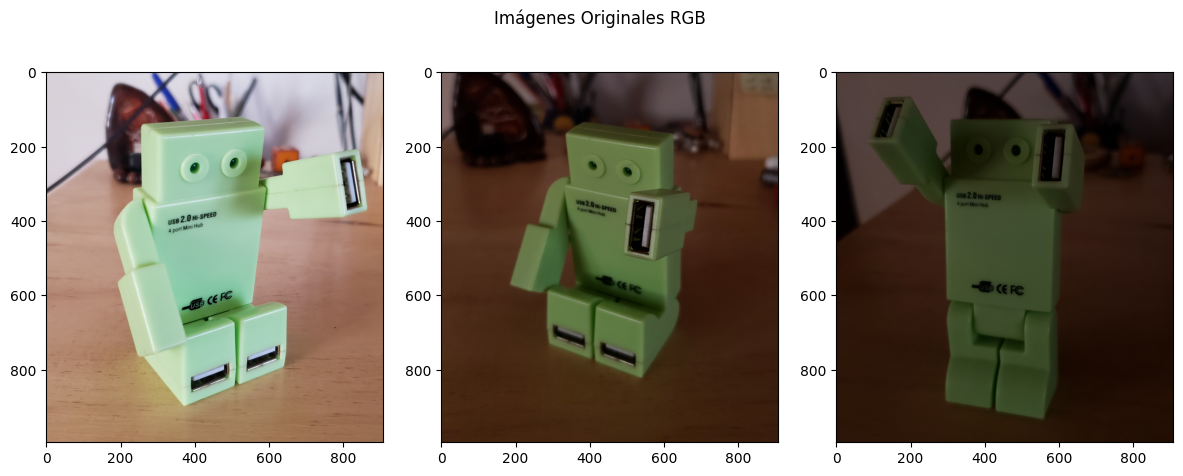

In [10]:
imgRGB1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
imgRGB2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
imgRGB3 = cv.cvtColor(img3, cv.COLOR_BGR2RGB)

fig, axs = plt.subplots(1,3, figsize=(12,5))
fig.suptitle('Imágenes Originales RGB')
fig.tight_layout() 

axs[0].imshow(imgRGB1.astype('uint8'))
axs[1].imshow(imgRGB2.astype('uint8'))
axs[2].imshow(imgRGB3.astype('uint8'))

In [11]:
im1_r, im1_g, im1_b = cv.split(imgRGB1)
im2_r, im2_g, im2_b = cv.split(imgRGB2)
im3_r, im3_g, im3_b = cv.split(imgRGB3)

Se anulan los valores cero en la división, sumando una constante

In [17]:
sum1 = (im1_r.astype('uint16')) + (im1_g.astype('uint16')) + (im1_b.astype('uint16')) + 0.00001
sum2 = (im2_r.astype('uint16')) + (im2_g.astype('uint16')) + (im2_b.astype('uint16')) + 0.00001
sum3 = (im3_r.astype('uint16')) + (im3_g.astype('uint16')) + (im3_b.astype('uint16')) + 0.00001

Se hace un ajuste de balance de color utilizando el producto de la división cada canal por la sumatoria de todos los canales (R + G + B +0.00001)

De este modo la imagen generada es invariante a los cambios de contraste

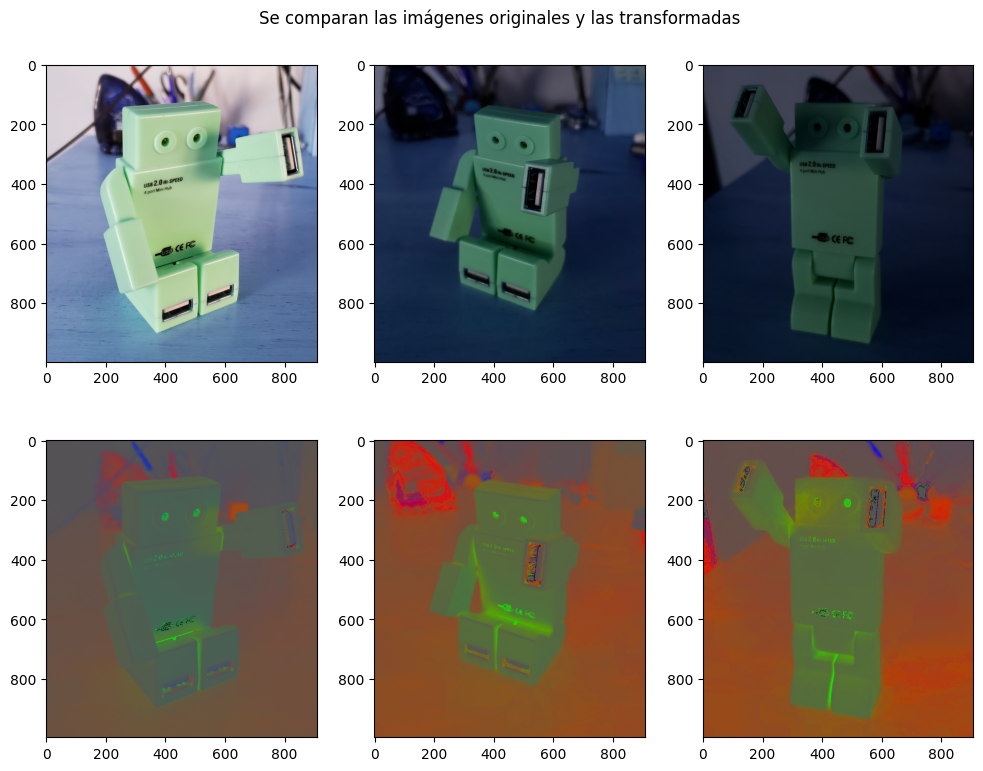

In [24]:
imgRGB12 = cv.merge((im1_r/sum1, im1_g/sum1, im1_b/sum1))
imgRGB22 = cv.merge((im2_r/sum2, im2_g/sum2, im2_b/sum2))
imgRGB32 = cv.merge((im3_r/sum3, im3_g/sum3, im3_b/sum3))

fig, axs = plt.subplots(2, 3, figsize=(10,8))
fig.suptitle('Se comparan las imágenes originales y las transformadas')
fig.tight_layout() 

axs[0,0].imshow(img1.astype(np.uint16))
axs[0,1].imshow(img2.astype(np.uint16))
axs[0,2].imshow(img3.astype(np.uint16))
axs[1,0].imshow((imgRGB12 * 255).astype(np.uint8))
axs[1,1].imshow((imgRGB22 * 255).astype(np.uint8))
axs[1,2].imshow((imgRGB32 * 255).astype(np.uint8))